In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
student_df = pd.read_csv("StudentsPerformance.csv")
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
student_df.columns = student_df.columns.str.replace(' ', '_')


## Data Preprocessing

In [7]:
display(student_df.describe())
display(student_df.describe(include=['O']))

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


## EDA

Text(0.5, 1.0, 'Heatmap of Literacy Scores')

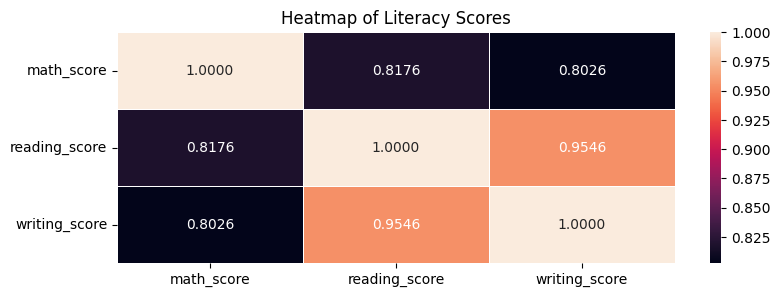

In [4]:
import numpy as np
%matplotlib inline

corr_matrix = student_df.corr(numeric_only=True)
plt.figure(figsize=(9, 3))
sns.heatmap(corr_matrix,annot=True, fmt='.4f', linewidth=.5)
plt.title("Heatmap of Literacy Scores")


In [5]:
student_df.iloc[:,5:8].apply(pd.to_numeric)

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


## Conduct Hypothesis Testing through Regression
Objective: Math Score is influenced by the reading and writing scores 
Null Hypothesis: The predictors do not explain variability in writing scores 

Writing Score=β0​+β1​(Reading Score)+β2​(Math Score)+ϵ


Alternative Hypothesis: At least one predictor explains the variability of writing scores





In [6]:
import statsmodels.api as sm

X = student_df[['reading_score', 'writing_score']]  # Predictors
y = student_df['math_score']  # Response variable
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:             math_score   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          2.918e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):                        0.00
Time:                        20:42:28   Log-Likelihood:                         -3592.7
No. Observations:                1000   AIC:                                      7189.
Df Residuals:                     998   BIC:                                      7199.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [7]:
student_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
# Find the average of literacy scores for each level of education
# group by = education
education_avg_df = student_df.groupby('parental_level_of_education')[['math_score', 'reading_score','writing_score']].mean()
education_avg_df

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [14]:
melted

,parental_level_of_education,score,average
0,associate's degree,math_score,67.882883
1,bachelor's degree,math_score,69.389831
2,high school,math_score,62.137755
3,master's degree,math_score,69.745763
4,some college,math_score,67.128319
5,some high school,math_score,63.497207
6,associate's degree,reading_score,70.927928
7,bachelor's degree,reading_score,73.000000
8,high school,reading_score,64.704082
9,master's degree,reading_score,75.372881


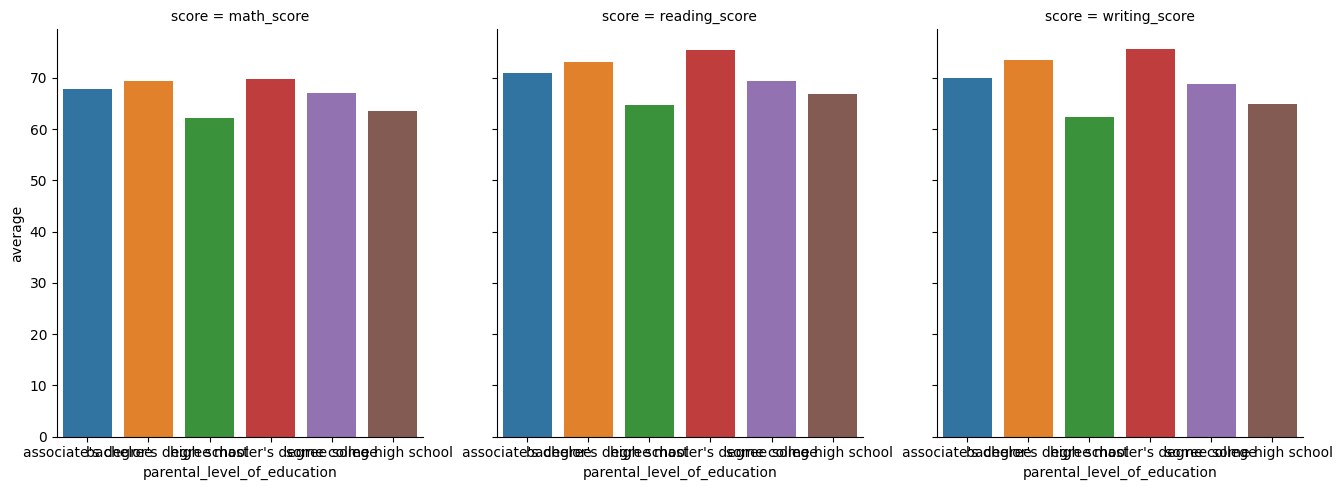

In [27]:
melted = education_avg_df.melt(var_name='score', value_name='average', ignore_index=False).reset_index()
sns.catplot(data=melted, kind='bar', x='parental_level_of_education', y='average',
            col='score', hue='parental_level_of_education',height=5, aspect=.9)